In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

%matplotlib inline

In [3]:
datafile = "../../Data/delay_calibration_raymond.csv"

data = np.loadtxt(datafile, delimiter=";")

dl = data[:,0]
V_c = data[:,1]
V_s = data[:,2]

dl_l = np.linspace(np.min(dl), np.max(dl), 1001)
V_c_l = np.linspace(np.min(V_c), np.max(V_c), 1001)
V_s_l = np.linspace(np.min(V_s), np.max(V_s), 1001)

In [4]:
def fitfunc(x, A, B, C):
    return A * 1 / (B - x) + C

popt, pcov = scipy.optimize.curve_fit(fitfunc, V_c, dl, p0=[1,3,0], maxfev=int(1e5))
print(popt)

[  5.57517520e+10  -4.43714096e+03   1.25611410e+07]


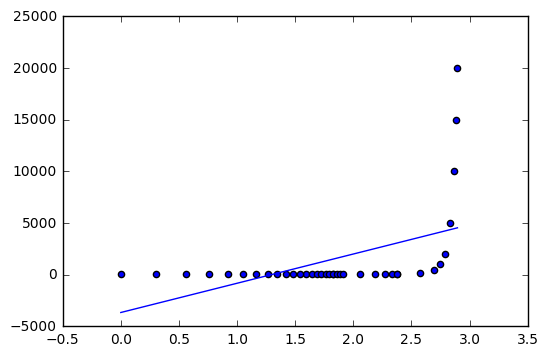

In [5]:
plt.scatter(V_c, dl)
plt.plot(V_c_l, fitfunc(V_c_l, *popt))

## Delay vs supply voltage

[ 127.77496919    0.94013363 -100.23751232   31.90281337   -1.26575978]


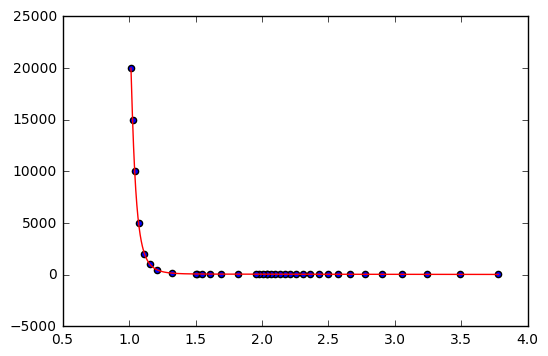

In [6]:
def fitfunc_supply(x, A, B, C, D, E):
    return A / (x-B) + C / (x-B)**2 + D / (x-B)**3 + E / (x-B)**4

# def fitfunc_supply(x, A, B, C):

popt_s, pcov_s = scipy.optimize.curve_fit(fitfunc_supply, V_s, dl, p0=[400,1, 0,0, 0], maxfev=int(1e5))

print(popt_s)

plt.scatter(V_s, dl)
plt.plot(V_s_l, fitfunc_supply(V_s_l, *popt_s), color='r')

[-108.66492218    3.0981889   462.21254317 -356.61073194   87.6210365 ]


(0, 2000)

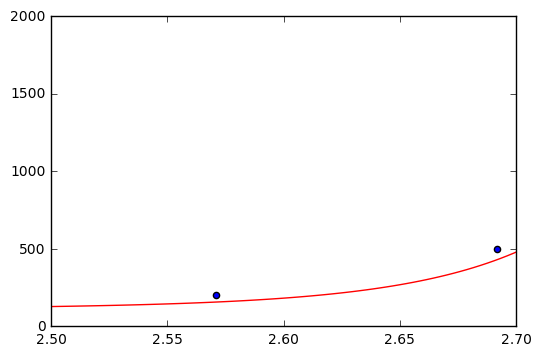

In [7]:
def fitfunc_control(x, A, B, C, D, E):
    return A / (B-x) + C / (B-x)**2 + D / (B-x)**3 + E / (B-x)**4

# def fitfunc_supply(x, A, B, C):

popt_s, pcov_s = scipy.optimize.curve_fit(fitfunc_control, V_c, dl, p0=[400,1, 0,0, 0], maxfev=int(1e5))

print(popt_s)

plt.scatter(V_c, dl)
plt.plot(V_c_l, fitfunc_control(V_c_l, *popt_s), color='r')
#plt.xlim(2.5,3)

plt.xlim(2.5, 2.7)
plt.ylim(0, 2000)

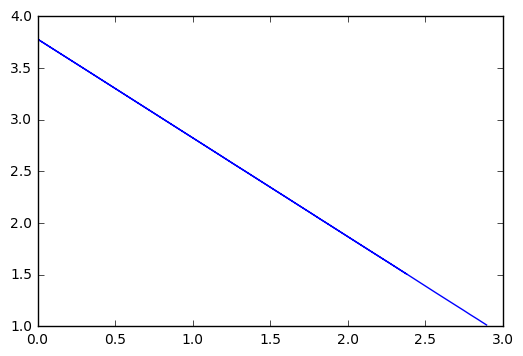

In [8]:
plt.plot(V_c, V_s)

[ -3.82250678e-02   4.51995036e-02  -9.50722959e-03   6.26088408e-04
   1.00000000e+00]


/Users/jesse/anaconda3/lib/python3.5/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


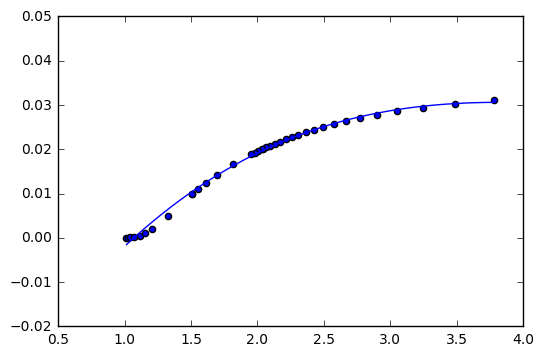

In [9]:
dl_inv = 1./dl

def fitfunc_supply_inv(x, A, B, C, D, E):
    return (A + B * x + C * x**2 + D * x**3)

popt_s_i, pcov_s_i = scipy.optimize.curve_fit(fitfunc_supply_inv, V_s, dl_inv)
print(popt_s_i)

plt.scatter(V_s, dl_inv)
plt.plot(V_s_l, fitfunc_supply_inv(V_s_l, *popt_s_i))